In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


In [55]:
def load_influx_csv(path: str) -> pd.DataFrame:
    df = pd.read_csv(path, skiprows=3, comment="#")
    df = df.drop(
        columns=[c for c in df.columns if "Unnamed" in str(c)], errors="ignore"
    )
    df["_time"] = pd.to_datetime(df["_time"], format="ISO8601")
    df["_value"] = pd.to_numeric(df["_value"], errors="coerce")
    return df

In [56]:
# Load all pod_20 datasets
base = "pod_20"
df_cpu = load_influx_csv(f"{base}/cpu_20.csv")
df_mem = load_influx_csv(f"{base}/memori_20.csv")
df_rep = load_influx_csv(f"{base}/replika_20.csv")
df_rt  = load_influx_csv(f"{base}/waktu_respon_20.csv")

# Convert to relative time (elapsed minutes from start)
min_time = min(df_cpu["_time"].min(), df_mem["_time"].min(),
               df_rep["_time"].min(), df_rt["_time"].min())

for df in [df_cpu, df_mem, df_rep, df_rt]:
    df["_elapsed_min"] = (df["_time"] - min_time).dt.total_seconds() / 60

print(f"CPU  rows: {len(df_cpu)},  deployments: {df_cpu['deployment'].unique()}")
print(f"MEM  rows: {len(df_mem)},  deployments: {df_mem['deployment'].unique()}")
print(f"REP  rows: {len(df_rep)},  deployments: {df_rep['deployment'].unique()}")
print(f"RT   rows: {len(df_rt)},   deployments: {df_rt['deployment'].unique()}")

CPU  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
MEM  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
REP  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
RT   rows: 722,   deployments: ['hpa-flask-app' 'test-flask-app']


✓ All pod_20 charts saved to pod_20/chart/


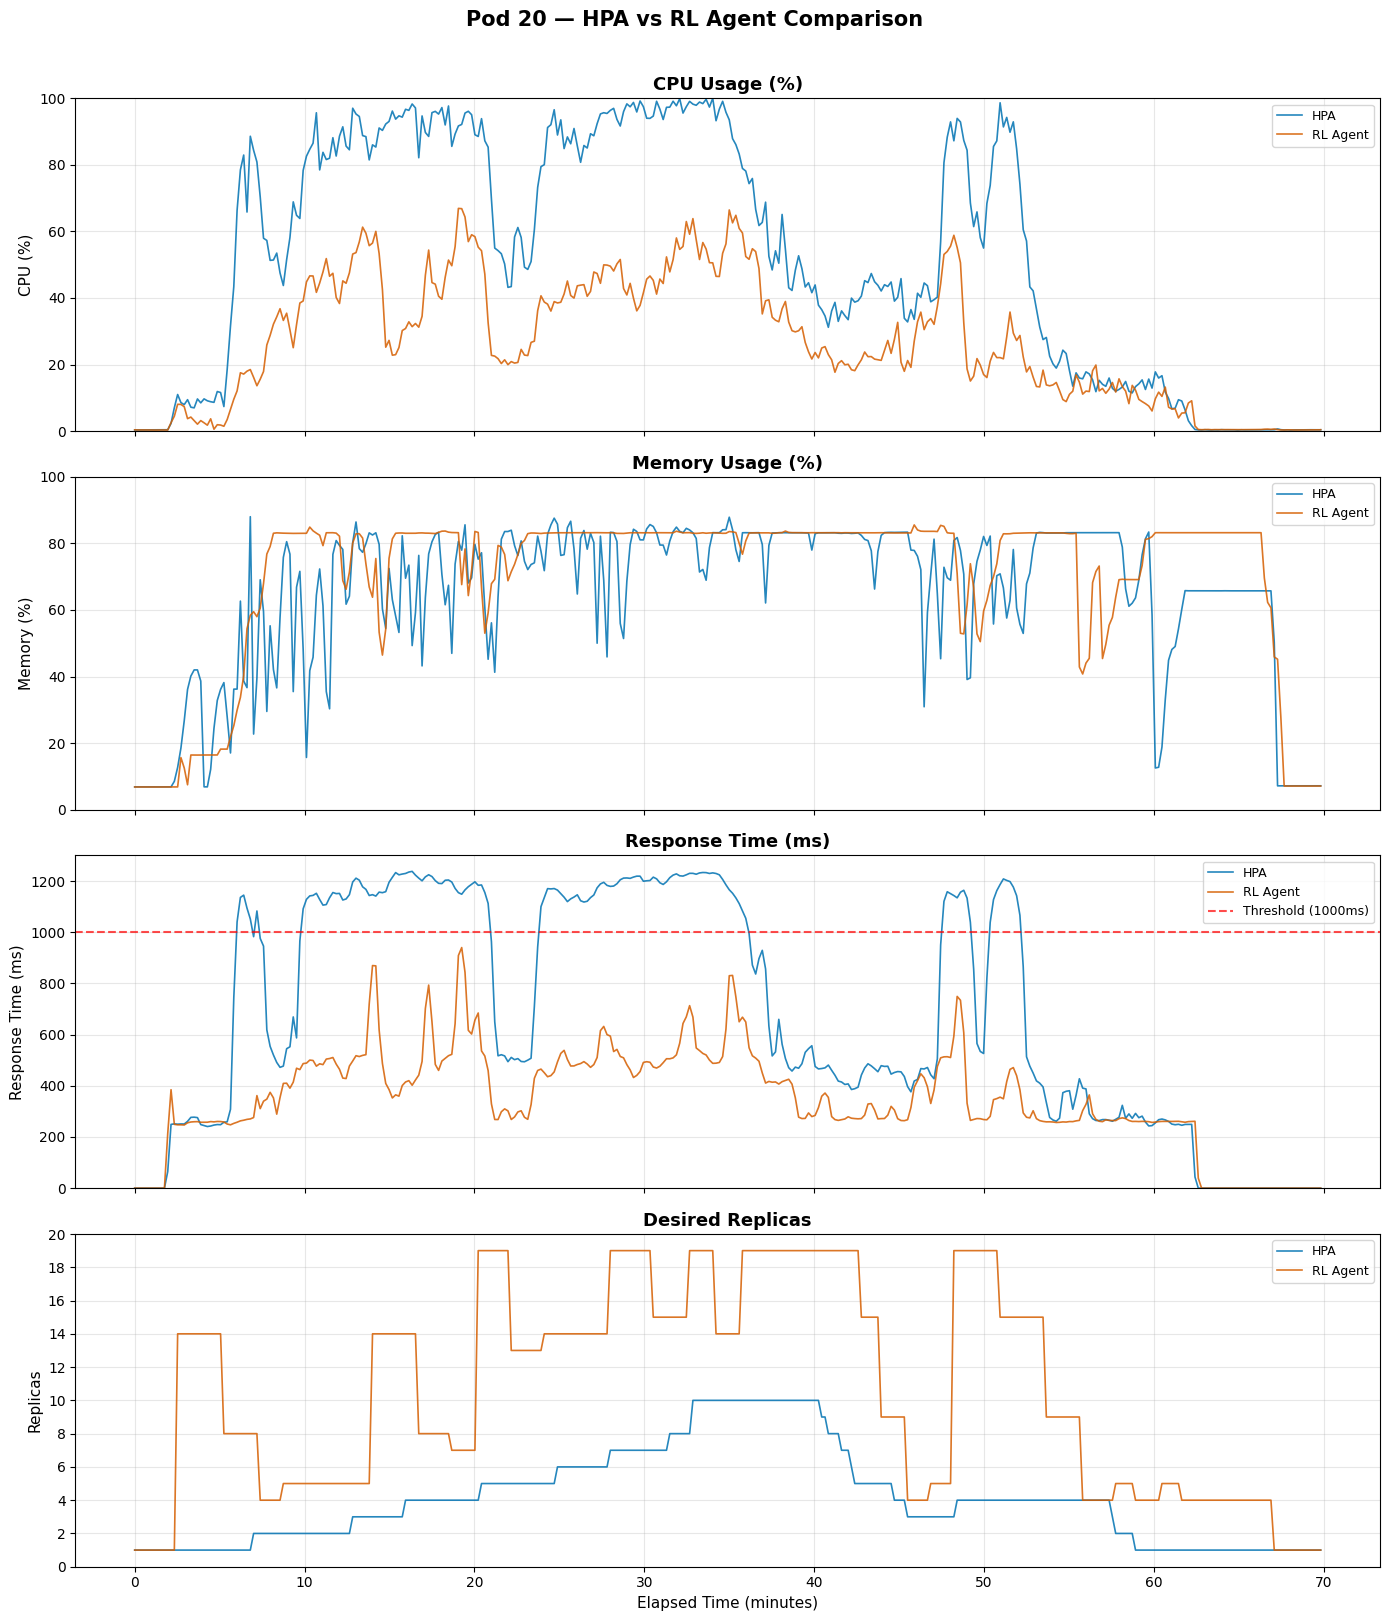

In [57]:
import os

# Create chart folder for pod_20
os.makedirs("pod_20/chart", exist_ok=True)

DEPLOY_A = "hpa-flask-app"
DEPLOY_B = "test-flask-app"
COLORS = {DEPLOY_A: "#0072B2", DEPLOY_B: "#D55E00"}  # cyan / pink

datasets = [
    (df_cpu, "CPU Usage (%)", "CPU (%)", "testing_cpu_usage_20.png", 100, None),
    (df_mem, "Memory Usage (%)", "Memory (%)", "testing_memory_usage_20.png", 100, None),
    (df_rt, "Response Time (ms)", "Response Time (ms)", "testing_response_time_20.png", 1300, 1000),
    (df_rep, "Desired Replicas", "Replicas", "testing_replicas_20.png", 20, None),
]

# Save individual charts
for df, title, ylabel, filename, ylim, threshold in datasets:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    for deploy in [DEPLOY_A, DEPLOY_B]:
        subset = df[df["deployment"] == deploy].sort_values("_elapsed_min")
        label = "HPA" if deploy == DEPLOY_A else "RL Agent"
        ax.plot(
            subset["_elapsed_min"],
            subset["_value"],
            label=label,
            color=COLORS[deploy],
            linewidth=1.5,
            alpha=0.85,
        )

    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel("Elapsed Time (minutes)", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_ylim(0, ylim)

    if "Replicas" in title:
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    if threshold:
        ax.axhline(y=threshold, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label=f"Threshold ({threshold}ms)")

    ax.legend(loc="upper right", fontsize=10)
    ax.grid(True, alpha=0.3)
    fig.tight_layout()
    fig.savefig(f"pod_20/chart/{filename}", dpi=300, bbox_inches="tight")
    plt.close()

print("✓ All pod_20 charts saved to pod_20/chart/")

# Display combined view
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

for ax, (df, title, ylabel, _, ylim, threshold) in zip(axes, datasets):
    for deploy in [DEPLOY_A, DEPLOY_B]:
        subset = df[df["deployment"] == deploy].sort_values("_elapsed_min")
        label = "HPA" if deploy == DEPLOY_A else "RL Agent"
        ax.plot(
            subset["_elapsed_min"],
            subset["_value"],
            label=label,
            color=COLORS[deploy],
            linewidth=1.2,
            alpha=0.85,
        )
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_ylim(0, ylim)
    if "Replicas" in title:
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    if threshold:
        ax.axhline(y=threshold, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label=f"Threshold ({threshold}ms)")
    ax.legend(loc="upper right", fontsize=9)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Elapsed Time (minutes)", fontsize=11)
fig.suptitle(
    "Pod 20 — HPA vs RL Agent Comparison", fontsize=15, fontweight="bold", y=1.01
)
fig.tight_layout()
plt.show()

In [58]:
# Load all pod_10 datasets
base = "pod_10"
df_cpu = load_influx_csv(f"{base}/cpu_10.csv")
df_mem = load_influx_csv(f"{base}/memori_10.csv")
df_rep = load_influx_csv(f"{base}/replika_10.csv")
df_rt  = load_influx_csv(f"{base}/waktu_respon_10.csv")

# Convert to relative time (elapsed minutes from start)
min_time = min(df_cpu["_time"].min(), df_mem["_time"].min(),
               df_rep["_time"].min(), df_rt["_time"].min())

for df in [df_cpu, df_mem, df_rep, df_rt]:
    df["_elapsed_min"] = (df["_time"] - min_time).dt.total_seconds() / 60

print(f"CPU  rows: {len(df_cpu)},  deployments: {df_cpu['deployment'].unique()}")
print(f"MEM  rows: {len(df_mem)},  deployments: {df_mem['deployment'].unique()}")
print(f"REP  rows: {len(df_rep)},  deployments: {df_rep['deployment'].unique()}")
print(f"RT   rows: {len(df_rt)},   deployments: {df_rt['deployment'].unique()}")

CPU  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
MEM  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
REP  rows: 722,  deployments: ['hpa-flask-app' 'test-flask-app']
RT   rows: 722,   deployments: ['hpa-flask-app' 'test-flask-app']


✓ All pod_10 charts saved to pod_10/chart/


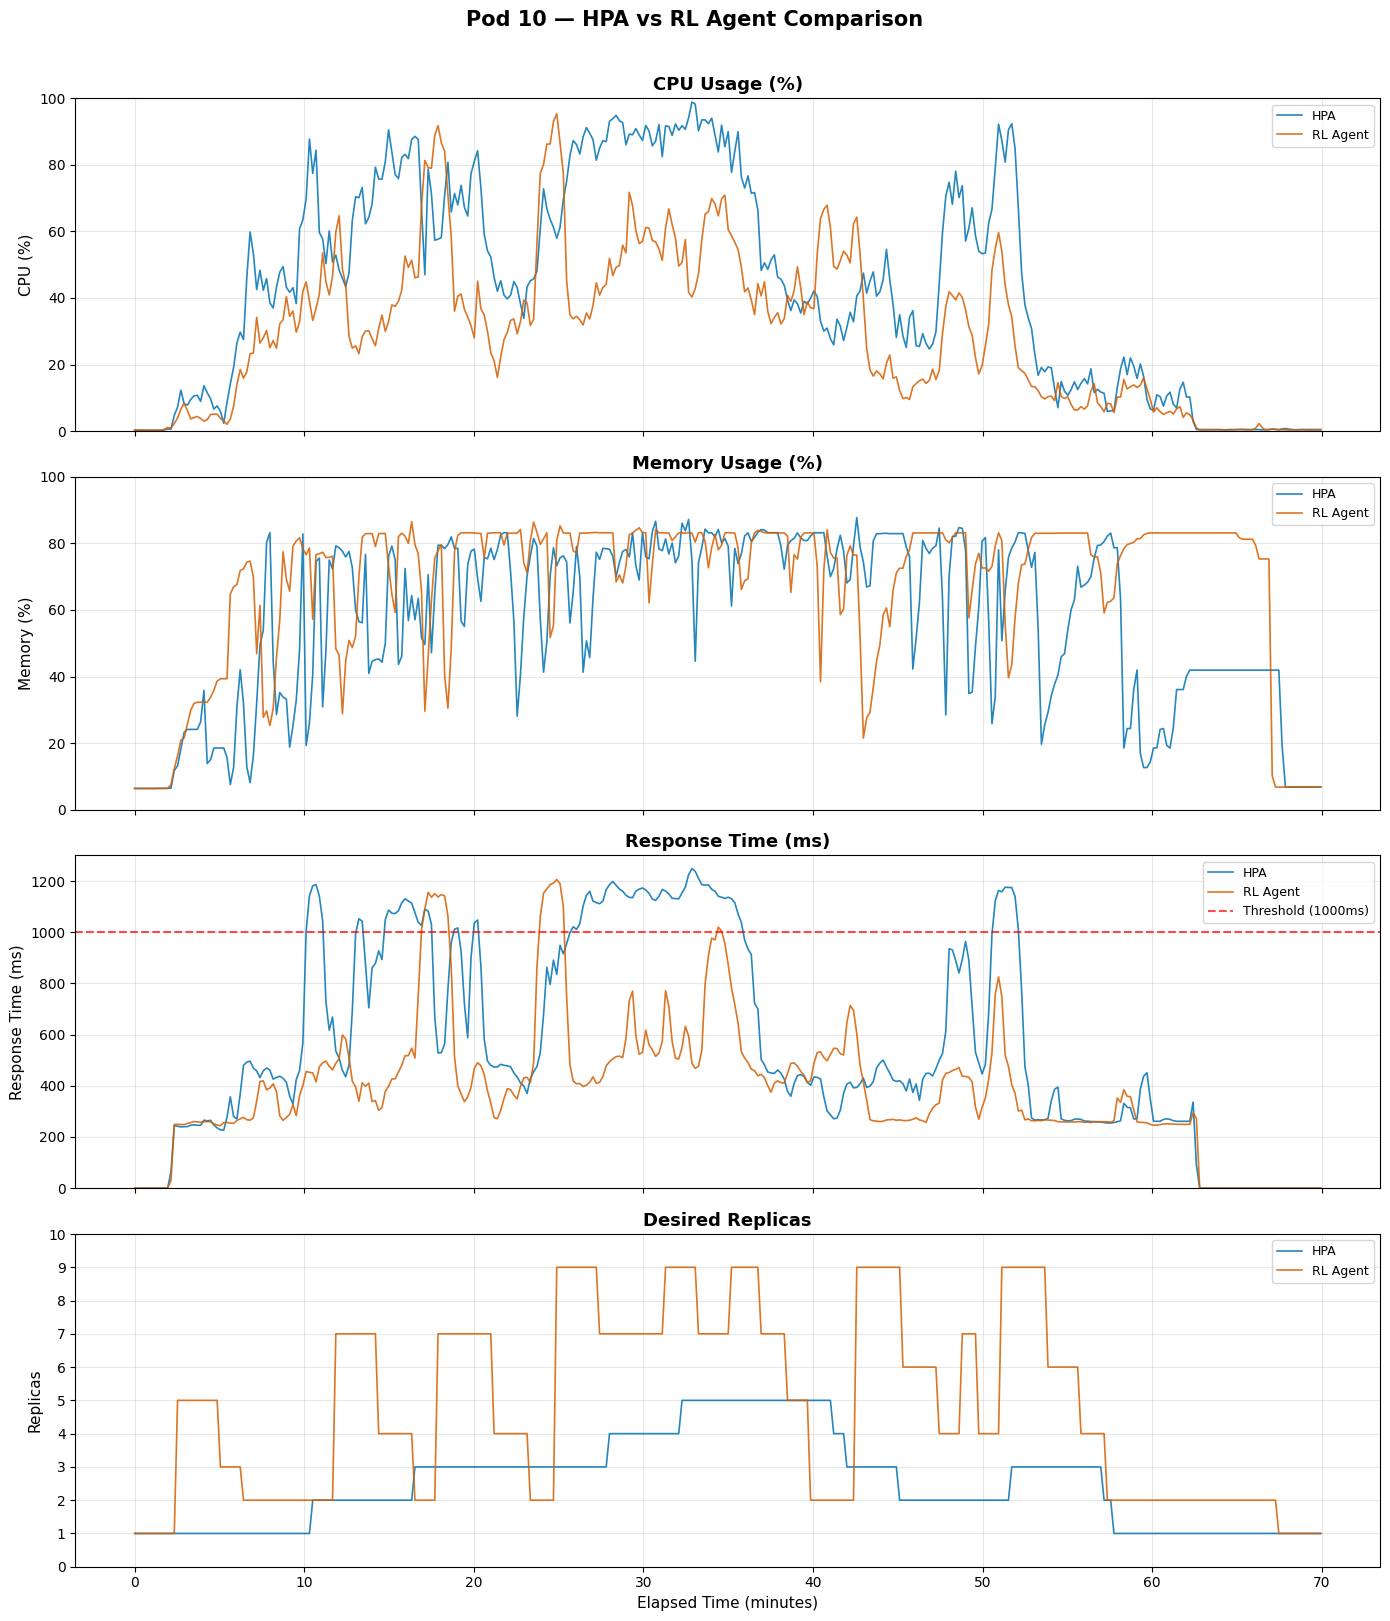

In [59]:
# Create chart folder for pod_10
os.makedirs("pod_10/chart", exist_ok=True)

DEPLOY_A = "hpa-flask-app"
DEPLOY_B = "test-flask-app"
COLORS = {DEPLOY_A: "#0072B2", DEPLOY_B: "#D55E00"}  # cyan / pink

datasets = [
    (df_cpu, "CPU Usage (%)", "CPU (%)", "testing_cpu_usage_10.png", 100, None),
    (df_mem, "Memory Usage (%)", "Memory (%)", "testing_memory_usage_10.png", 100, None),
    (df_rt, "Response Time (ms)", "Response Time (ms)", "testing_response_time_10.png", 1300, 1000),
    (df_rep, "Desired Replicas", "Replicas", "testing_replicas_10.png", 10, None),
]

# Save individual charts
for df, title, ylabel, filename, ylim, threshold in datasets:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    for deploy in [DEPLOY_A, DEPLOY_B]:
        subset = df[df["deployment"] == deploy].sort_values("_elapsed_min")
        label = "HPA" if deploy == DEPLOY_A else "RL Agent"
        ax.plot(
            subset["_elapsed_min"],
            subset["_value"],
            label=label,
            color=COLORS[deploy],
            linewidth=1.5,
            alpha=0.85,
        )

    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel("Elapsed Time (minutes)", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_ylim(0, ylim)

    if "Replicas" in title:
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    if threshold:
        ax.axhline(y=threshold, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label=f"Threshold ({threshold}ms)")

    ax.legend(loc="upper right", fontsize=10)
    ax.grid(True, alpha=0.3)
    fig.tight_layout()
    fig.savefig(f"pod_10/chart/{filename}", dpi=300, bbox_inches="tight")
    plt.close()

print("✓ All pod_10 charts saved to pod_10/chart/")

# Display combined view
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

for ax, (df, title, ylabel, _, ylim, threshold) in zip(axes, datasets):
    for deploy in [DEPLOY_A, DEPLOY_B]:
        subset = df[df["deployment"] == deploy].sort_values("_elapsed_min")
        label = "HPA" if deploy == DEPLOY_A else "RL Agent"
        ax.plot(
            subset["_elapsed_min"],
            subset["_value"],
            label=label,
            color=COLORS[deploy],
            linewidth=1.2,
            alpha=0.85,
        )
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_ylim(0, ylim)
    if "Replicas" in title:
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    if threshold:
        ax.axhline(y=threshold, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label=f"Threshold ({threshold}ms)")
    ax.legend(loc="upper right", fontsize=9)
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Elapsed Time (minutes)", fontsize=11)
fig.suptitle(
    "Pod 10 — HPA vs RL Agent Comparison", fontsize=15, fontweight="bold", y=1.01
)
fig.tight_layout()
plt.show()
